In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:2]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg')]

In [7]:
roses[0],str(roses[0])

(WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg')

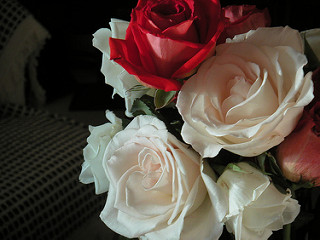

In [8]:
PIL.Image.open(roses[1])

In [9]:
flowers_name = ['roses','daisy','dandelion','sunflowers','tulips']
flowers_image_dict = dict()

In [10]:
for name in flowers_name:
    flowers_image_dict[name]=list(data_dir.glob(name+'/*'))
    
flowers_image_dict['tulips'][:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

In [11]:
flowers_label_dict = {name:idx for idx,name in enumerate(flowers_name)}
flowers_label_dict

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [16]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [17]:
x,y = [],[]
for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img_resized = cv2.resize(img,(180,180))
        x.append(img_resized)
        y.append(flowers_label_dict[flower_name])

In [18]:
x[:2],y[:2]

([array([[[ 1, 16,  7],
          [ 1, 16,  7],
          [ 1, 17,  9],
          ...,
          [23, 50, 31],
          [25, 51, 32],
          [26, 52, 33]],
  
         [[10, 23, 15],
          [10, 23, 15],
          [ 9, 22, 14],
          ...,
          [20, 44, 30],
          [23, 47, 33],
          [26, 50, 36]],
  
         [[13, 20, 13],
          [12, 20, 13],
          [11, 19, 12],
          ...,
          [21, 43, 30],
          [22, 45, 31],
          [25, 48, 34]],
  
         ...,
  
         [[12, 24, 18],
          [11, 22, 15],
          [12, 21, 11],
          ...,
          [ 7, 14,  7],
          [ 2,  8,  2],
          [ 0,  2,  0]],
  
         [[19, 30, 28],
          [16, 26, 21],
          [14, 22, 15],
          ...,
          [ 3, 12,  2],
          [ 0,  8,  1],
          [ 0,  6,  1]],
  
         [[11, 21, 20],
          [17, 25, 24],
          [21, 28, 23],
          ...,
          [ 1, 12,  2],
          [ 2, 10,  3],
          [ 3, 10,  4]]], dtype=u

In [19]:
X = np.array(x)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=0)

In [21]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [24]:
# number of different types of flower is 5
# so final dense have to be 5

model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [25]:
model.fit(X_train_scaled,y_train,epochs=40)

Epoch 1/40
86/86 [==============================] - 18s 81ms/step - loss: 1.4853 - accuracy: 0.3830
Epoch 2/40
86/86 [==============================] - 6s 73ms/step - loss: 1.0802 - accuracy: 0.5614
Epoch 3/40
86/86 [==============================] - 6s 74ms/step - loss: 0.9296 - accuracy: 0.6443
Epoch 4/40
86/86 [==============================] - 7s 79ms/step - loss: 0.7857 - accuracy: 0.7049
Epoch 5/40
86/86 [==============================] - 7s 83ms/step - loss: 0.6268 - accuracy: 0.7656
Epoch 6/40
86/86 [==============================] - 7s 80ms/step - loss: 0.4373 - accuracy: 0.8470
Epoch 7/40
86/86 [==============================] - 7s 83ms/step - loss: 0.2782 - accuracy: 0.8997 0s - loss: 0.2774 - 
Epoch 8/40
86/86 [==============================] - 8s 87ms/step - loss: 0.1813 - accuracy: 0.9371
Epoch 9/40
86/86 [==============================] - 7s 84ms/step - loss: 0.0911 - accuracy: 0.9731
Epoch 10/40
86/86 [==============================] - 7s 84ms/step - loss: 0.0647 - accu

In [26]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 12s 91ms/step - loss: 2.8229 - accuracy: 0.6481


[2.822904348373413, 0.6481481194496155]

In [54]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomContrast(0.9),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip('horizontal')
])

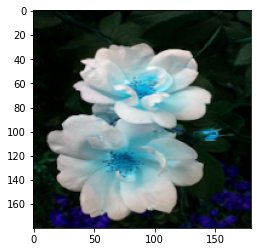

In [55]:
plt.imshow(X[0])

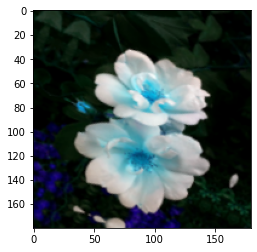

In [59]:
plt.imshow(data_augmentation(X[:3])[0])

# now we will add augmentation in model build

In [65]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [69]:
X_train_scaled.shape

(2752, 180, 180, 3)

In [70]:
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 16s 93ms/step - loss: 0.5286 - accuracy: 0.7932
Epoch 2/30
86/86 [==============================] - 8s 92ms/step - loss: 0.4825 - accuracy: 0.8252
Epoch 3/30
86/86 [==============================] - 8s 92ms/step - loss: 0.5220 - accuracy: 0.8081
Epoch 4/30
86/86 [==============================] - 8s 91ms/step - loss: 0.5047 - accuracy: 0.8070
Epoch 5/30
86/86 [==============================] - 8s 91ms/step - loss: 0.4801 - accuracy: 0.8140
Epoch 6/30
86/86 [==============================] - 8s 93ms/step - loss: 0.5156 - accuracy: 0.8056
Epoch 7/30
86/86 [==============================] - 8s 96ms/step - loss: 0.4207 - accuracy: 0.8383
Epoch 8/30
86/86 [==============================] - 8s 96ms/step - loss: 0.5364 - accuracy: 0.7969 0s - loss: 0.5477 - accura
Epoch 9/30
86/86 [==============================] - 9s 99ms/step - loss: 0.4397 - accuracy: 0.8441
Epoch 10/30
86/86 [==============================] - 9s 99ms/step - loss: 0.5562 

In [71]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 33ms/step - loss: 1.0266 - accuracy: 0.7527


[1.0265518426895142, 0.7527233362197876]